In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('dataset/Dummies.csv')

In [3]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,84.0,1845.273810,104.530661,1634.0,1772.00,1846.00,1934.0000,2050.00
GPA,84.0,3.330238,0.271617,2.4,3.19,3.38,3.5025,3.81


In [5]:
df = raw_data.copy()

In [6]:
df['Attendance'] = df['Attendance'].map({'Yes': 1, 'No': 0})

In [7]:
df.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,84.0,1845.273810,104.530661,1634.0,1772.00,1846.00,1934.0000,2050.00
GPA,84.0,3.330238,0.271617,2.4,3.19,3.38,3.5025,3.81
Attendance,84.0,0.464286,0.501718,0.0,0.00,0.00,1.0000,1.00


In [9]:
y = df['GPA']
x1 = df[['SAT', 'Attendance']]

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.19e-15
Time:                        19:16:04   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance -> 0, 1

GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance -> 0, 1

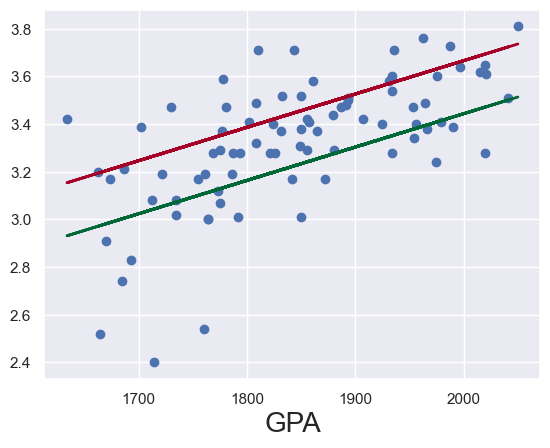

In [11]:
plt.scatter(df['SAT'], y)
yhat_no = 0.6439 + 0.0014 * df['SAT']
yhat_yes = 0.8665 + 0.0014 * df['SAT']
plt.plot(df['SAT'], yhat_no, lw=2, c='#006837')
plt.plot(df['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

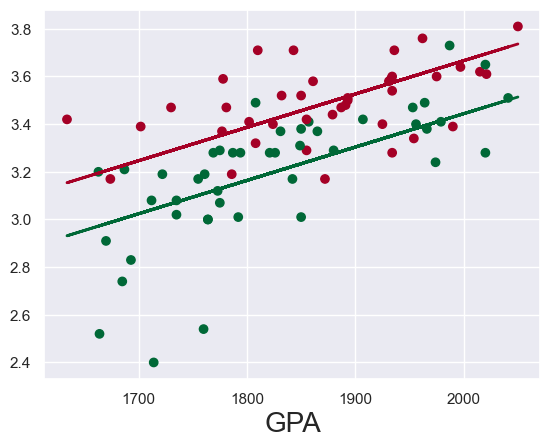

In [12]:
plt.scatter(df['SAT'], df['GPA'], c=df['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * df['SAT']
yhat_yes = 0.8665 + 0.0014 * df['SAT']
plt.plot(df['SAT'], yhat_no, lw=2, c='#006837')
plt.plot(df['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

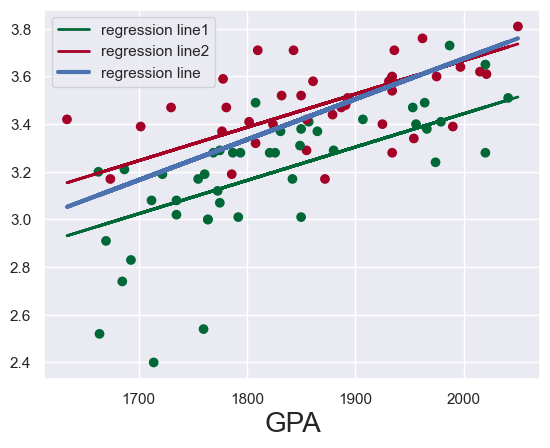

In [13]:
plt.scatter(df['SAT'], df['GPA'], c=df['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * df['SAT']
yhat_yes = 0.8665 + 0.0014 * df['SAT']
yhat = 0.0017 * df['SAT'] + 0.275
plt.plot(df['SAT'], yhat_no, lw=2, c='#006837', label='regression line1')
plt.plot(df['SAT'], yhat_yes, lw=2, c='#a50026', label='regression line2')
plt.plot(df['SAT'], yhat, lw=3, c='#4C72B0', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.legend()
plt.show()

In [14]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [15]:
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [16]:
new_data.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [17]:
predictions = results.predict(new_data)

In [18]:
predictions

0    3.023513
1    3.204163
dtype: float64

In [19]:
predictiondf = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictiondf)
joined.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
